In [1]:
!nvidia-smi

Fri Dec 20 17:55:42 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os, shutil, sys
from os import path
from os import path as osp
import numpy as np

base_dir = os.getcwd() #can be git repo or another folder at same level
print('base_dir:',base_dir)
moduledir = osp.join(base_dir,'../image-restoration-github')
os.chdir(moduledir)
import ImageRestorer as IR
import ImagePipeline_utils as IP
os.chdir(base_dir)

restorer = IR.ImageRestorer()


base_dir: /home/mickael.tits/image-restoration-github


In [3]:
#Use any folder, create the input_dir and put your images in it
input_dir = osp.join(base_dir, 'tmp_input_test')
output_dir = osp.join(base_dir, 'MyResults_test')

IP.createdir_ifnotexists(input_dir)
IP.createdir_ifnotexists(output_dir)

python_dir = sys.executable
print('python_dir:', python_dir)

python_dir: /home/mickael.tits/miniconda/envs/imagepipeline/bin/python


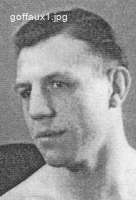

In [4]:
IP.display_folder(input_dir, imageheight = 200, labelsize = 10, imagetype = 'L')

In [5]:
# Check if thare are images in input_dir
if not os.listdir(input_dir):
    raise Exception("Input directory is empty. No images to process.")

In [6]:
preprocess_dir = osp.join(output_dir, 'preprocess')
restorer.preprocess(input_dir, preprocess_dir, gray = True, resize = True)

Image preprocessing...: finished in 0.0050 s


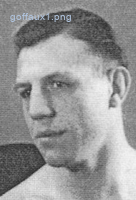

In [7]:
IP.display_folder(preprocess_dir, imageheight = 200, labelsize = 10)

Removing stripes...: finished in 5.2826 s
Error or warning occured during process. Please check output below.
Using TensorFlow backend.



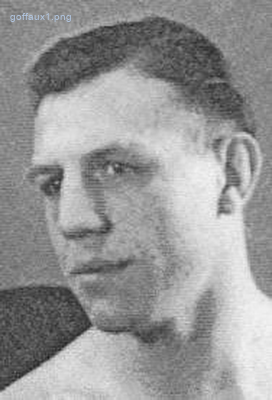

In [8]:
destripe_dir = osp.join(output_dir, 'destripe')
restorer.remove_stripes(input_dir, destripe_dir, process_args = '-n 1')
IP.display_folder(destripe_dir, imageheight = 400, labelsize = 10)

Colorizing...: finished in 14.6058 s


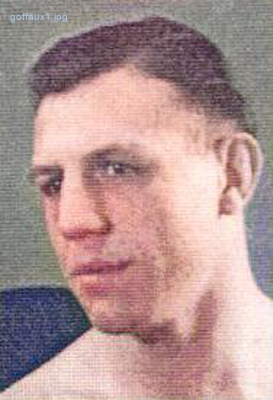

In [9]:
color_dir = osp.join(output_dir, 'colorized')
restorer.colorize(input_dir, color_dir, process_args = "-r 7")
IP.display_folder(color_dir, imageheight = 400, labelsize = 10)

Removing gaussian noise...: finished in 7.2283 s
Error or warning occured during process. Please check output below.
Using TensorFlow backend.



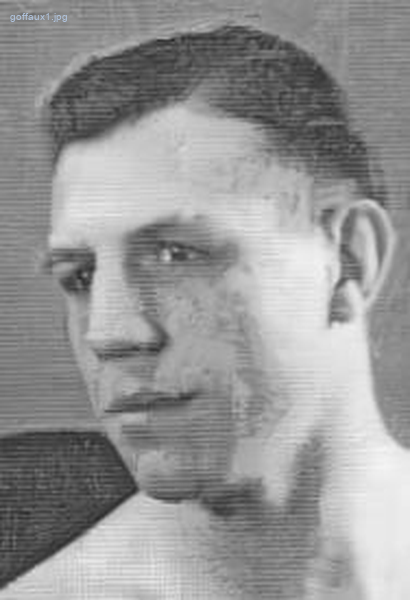

In [10]:
denoise_dir = osp.join(output_dir, 'NLRN')
restorer.denoise(input_dir, denoise_dir)
IP.display_folder(denoise_dir, imageheight = 600, labelsize = 10)

Removing gaussian noise...: finished in 7.6417 s
Error or warning occured during process. Please check output below.
Using TensorFlow backend.



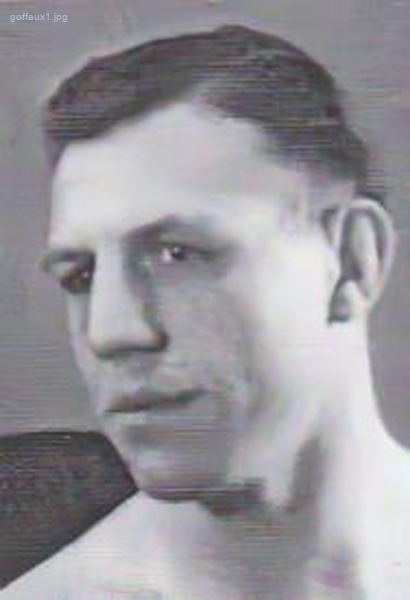

In [11]:
denoise_dir = osp.join(output_dir, 'DnCNN')
restorer.denoise(input_dir, denoise_dir, fast = True)
IP.display_folder(denoise_dir, imageheight = 600, labelsize = 10)

Super-resolving...: finished in 5.6068 s


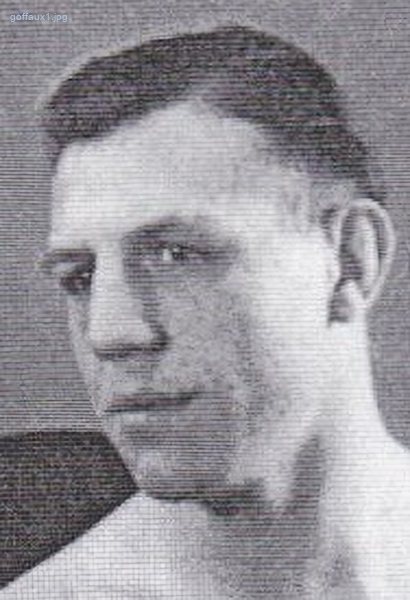

In [12]:
superres_dir = osp.join(output_dir, 'super_resolution')
restorer.super_resolution(input_dir, superres_dir)
IP.display_folder(superres_dir, imageheight = 600, labelsize = 10)

In [13]:
original_dir = osp.join(output_dir,'original')
IP.duplicatedir(input_dir, original_dir)

Image preprocessing...: finished in 0.0240 s
Removing gaussian noise...: finished in 8.7291 s
Error or warning occured during process. Please check output below.
Using TensorFlow backend.

Removing stripes...: finished in 5.3178 s
Error or warning occured during process. Please check output below.
Using TensorFlow backend.

Colorizing...: finished in 14.4761 s
Super-resolving...: finished in 5.5803 s


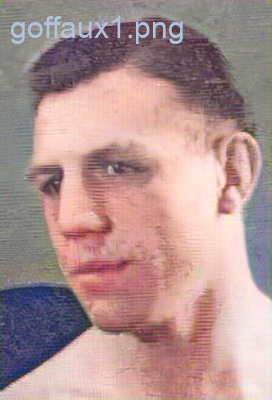

In [4]:
pipe_dir = osp.join(output_dir, 'pipeline')
IP.duplicatedir(input_dir, pipe_dir)
restorer.preprocess(pipe_dir)
restorer.denoise(process_args = "-s 10 -p 31")
restorer.remove_stripes(process_args = "-n 2")
restorer.colorize(process_args = "-r 7")
restorer.super_resolution()
restorer.display(imageheight = 400)

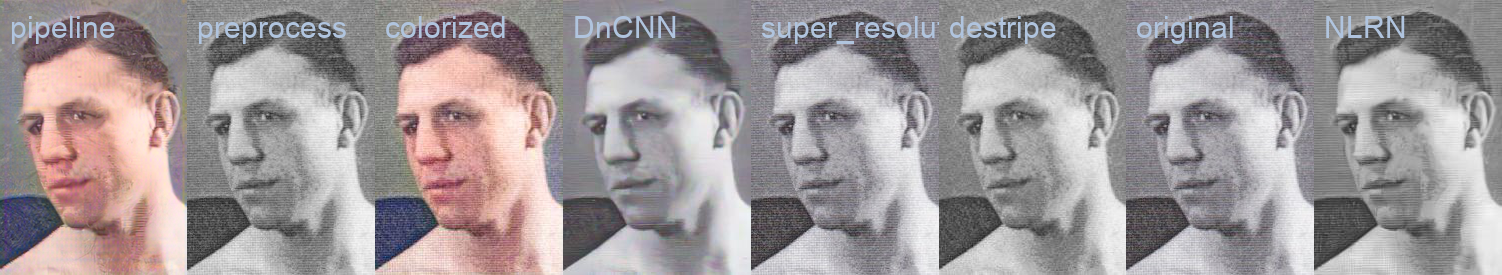

In [16]:
IP.compare_folders(output_dir)

In [6]:
logdata = restorer.logerr()
logdata

[]

In [18]:
restorer.log(10)

['Test Over\n',
 'NLRN Model loaded...\n',
 'goffaux1.png: finished in 3.6165 s\n',
 'Denoising - NLRN: finished in 3.6166 s\n',
 '1. goffaux1.png: finished in 2.9980 s\n',
 'Colorization: finished in 2.9981 s\n',
 'Model path ./ESRGAN/models/RRDB_PSNR_x4.pth. \n',
 'Testing...\n',
 '1 goffaux1\n',
 'super-resolution: finished in 0.7289 s\n']

In [19]:
restorer.history()

[{'input': '/home/mickael.tits/image-restoration-github/tmp_input_test',
  'output': '/home/mickael.tits/image-restoration-github/MyResults_test/preprocess',
  'process': 'preprocess',
  'options': {'gray': True,
   'resize': True,
   'size': (1000, 1000),
   'quiet': True,
   'raising': True}},
 {'input': '/home/mickael.tits/image-restoration-github/tmp_input_test',
  'output': '/home/mickael.tits/image-restoration-github/MyResults_test/destripe',
  'process': 'remove_stripes',
  'options': {'working_dir': './WDNN',
   'raising': True,
   'quiet': True,
   'python_dir': '/home/mickael.tits/miniconda/envs/imagepipeline/bin/python',
   'process_args': '-n 1',
   'command_suffix': ' 2> log.err 1>> log.out'}},
 {'input': '/home/mickael.tits/image-restoration-github/tmp_input_test',
  'output': '/home/mickael.tits/image-restoration-github/MyResults_test/colorized',
  'process': 'colorize',
  'options': {'working_dir': './',
   'raising': True,
   'quiet': True,
   'python_dir': '/home/mick

In [20]:
restorer.log(1)

['super-resolution: finished in 0.7289 s\n']

Image merging...: finished in 0.0073 s


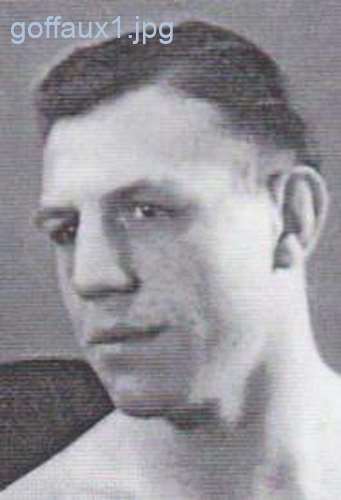

In [15]:
merged_dir = osp.join(output_dir, 'merged')
restorer.merge([input_dir,osp.join(output_dir,'DnCNN')],merged_dir, weights = [0.2,0.8])
restorer.display(imageheight = 500)

Image merging...: finished in 0.0077 s


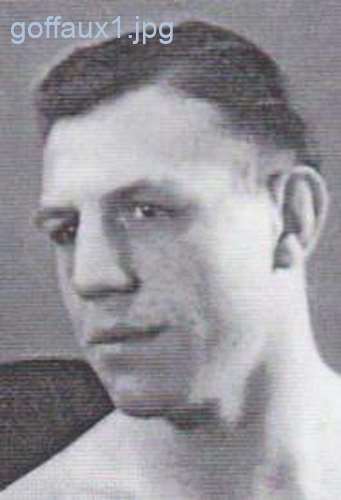

In [14]:
merged_dir = osp.join(output_dir, 'merged01')
restorer.merge([input_dir,osp.join(output_dir,'DnCNN')],merged_dir, weights = [0.0,1])
restorer.display(imageheight = 500)

Image merging...: finished in 0.0072 s


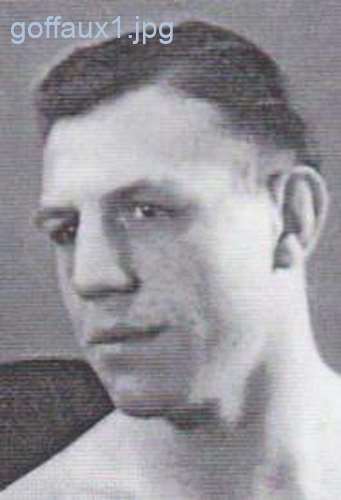

In [16]:
merged_dir = osp.join(output_dir, 'merged10')
restorer.merge([input_dir,osp.join(output_dir,'DnCNN')], merged_dir, weights = [1,0.0])
restorer.display(imageheight = 500)

In [18]:
restorer._history[-3:]

[{'input': ['/home/mickael.tits/image-restoration-github/tmp_input_test',
   '/home/mickael.tits/image-restoration-github/MyResults_test/DnCNN'],
  'output': '/home/mickael.tits/image-restoration-github/MyResults_test/merged01',
  'process': 'merge',
  'options': {'weights': [0.0, 1], 'raising': True, 'quiet': True}},
 {'input': ['/home/mickael.tits/image-restoration-github/tmp_input_test',
   '/home/mickael.tits/image-restoration-github/MyResults_test/DnCNN'],
  'output': '/home/mickael.tits/image-restoration-github/MyResults_test/merged',
  'process': 'merge',
  'options': {'weights': [0.2, 0.8], 'raising': True, 'quiet': True}},
 {'input': ['/home/mickael.tits/image-restoration-github/tmp_input_test',
   '/home/mickael.tits/image-restoration-github/MyResults_test/DnCNN'],
  'output': '/home/mickael.tits/image-restoration-github/MyResults_test/merged10',
  'process': 'merge',
  'options': {'weights': [1, 0.0], 'raising': True, 'quiet': True}}]